In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os.path
from collections import defaultdict

In [2]:
path_to_csv = '/mnt/c/Users/gweld/sidewalk/minus_onboard.csv'

In [3]:
get_label_name = ["Curb Ramp",
                  "Missing Curb Ramp",
                  "Obstruction",
                  "Surface Problem",
                  "No Sidewalk",
                  "Occlusion",
                  "Other"]

In [4]:
xs = [] # sv x
ys = [] # sv y
lb = [] # label
vh = [] # viewer heading
ph = [] # photog heading
vd = [] # vertical degree
hd = [] # horizontal degree
photog_heading_degree  = [] # horiz_degree + photog heading
viewer_heading_degree  = [] # horiz_degree + viewer heading

panocounts       = defaultdict(int)
feat_type_counts = defaultdict(int)

with open(path_to_csv) as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')

    for row in csvreader:
        xs.append(float(row[1]))   # sv_image_x
        ys.append(float(row[2]))   # sv_image_y
        lb.append(int(  row[3])-1) # label_type_id
        vh.append( float(row[5]) ) # viewer heading
        ph.append( float(row[4]) ) # photographer heading
        
        vert_degree = (float(row[2]) / 3328) * 90
        vd.append( vert_degree )
        
        horiz_degree = ((float(row[1]) / 13312) * 360 ) % 360
        hd.append( horiz_degree )
        photog_heading_degree.append( (horiz_degree + float(row[4])) % 360 )
        viewer_heading_degree.append( (horiz_degree + float(row[5])) % 360 )
        
        label = get_label_name[ int(  row[3])-1 ]
        feat_type_counts[label] += 1
        
        panocounts[row[0]] += 1

print "xs span {} - {}".format(min(xs), max(xs))
print "ys span {} - {}".format(min(ys), max(ys))
print "with {} points counted".format(len(xs))
print "from {} panos".format(len(panocounts))

xs span 0.0 - 14864.0
ys span -2369.0 - 1015.0
with 247317 points counted
from 75392 panos


In [5]:
print "{:<20} {}".format("Label", "Count")
for label, count in sorted(feat_type_counts.items(), key=lambda x: x[1], reverse=True):
    print "{:<20} {}".format(label, count)

Label                Count
Curb Ramp            149252
Other                44771
Obstruction          22016
Missing Curb Ramp    19549
Surface Problem      8781
No Sidewalk          1521
Occlusion            1427


In [6]:
r = ((0, 13312),(-3328, 3328))

# Heatmap of Raw sv_X, sv_Y

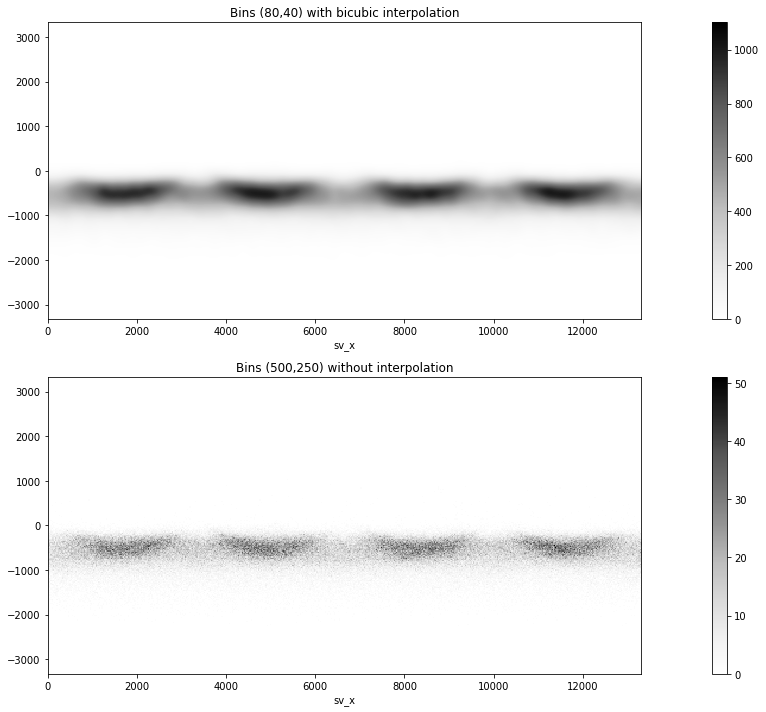

In [7]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
heatmap, xedges, yedges = np.histogram2d(xs, ys, bins=(80,40), range=r)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(np.flipud(heatmap.T), extent=extent, cmap='Greys', interpolation='bicubic')
plt.title("Bins (80,40) with bicubic interpolation")
plt.xlabel("sv_x")
plt.colorbar()

plt.subplot(2,1,2)
heatmap, xedges, yedges = np.histogram2d(xs, ys, bins=(500,250), range=r)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(np.flipud(heatmap.T), extent=extent, cmap='Greys', interpolation='none')
plt.title("Bins (500,250) without interpolation")
plt.xlabel("sv_x")
plt.colorbar()

plt.tight_layout()
plt.show()

# Let's try looking at heading and photog heading

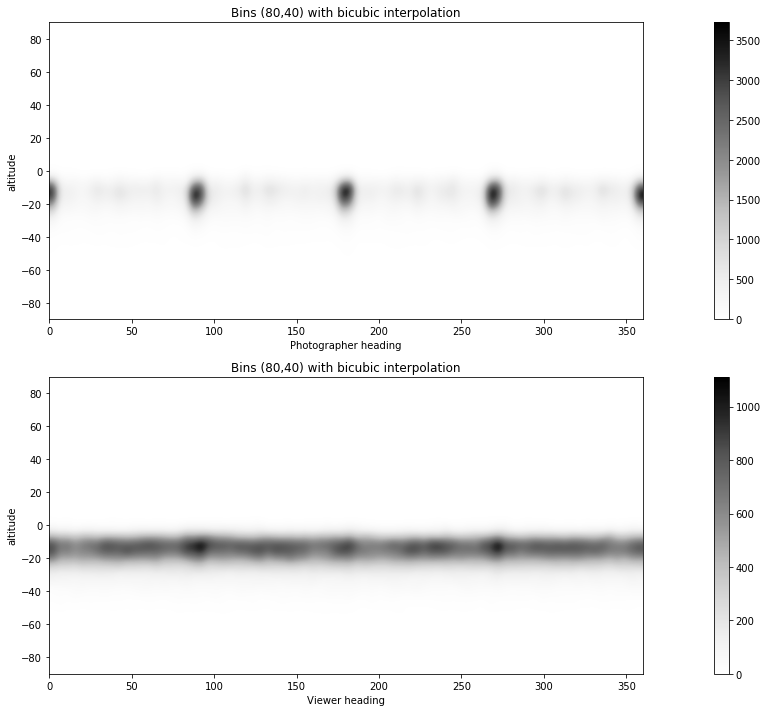

In [8]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
heatmap, xedges, yedges = np.histogram2d(ph, vd, bins=(80,40), range=((0, 360),(-90, 90)) )
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(np.flipud(heatmap.T), extent=extent, cmap='Greys', interpolation='bicubic')
plt.title("Bins (80,40) with bicubic interpolation")
plt.colorbar()
plt.xlabel('Photographer heading')
plt.ylabel('altitude')

plt.subplot(2,1,2)
heatmap, xedges, yedges = np.histogram2d(vh, vd, bins=(80,40), range=((0, 360),(-90, 90)) )
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(np.flipud(heatmap.T), extent=extent, cmap='Greys', interpolation='bicubic')
plt.title("Bins (80,40) with bicubic interpolation")
plt.colorbar()
plt.xlabel('Viewer heading')
plt.ylabel('altitude')

plt.tight_layout()
plt.show()

# now let's see if sv_x and y are aligned with the street or compass directions


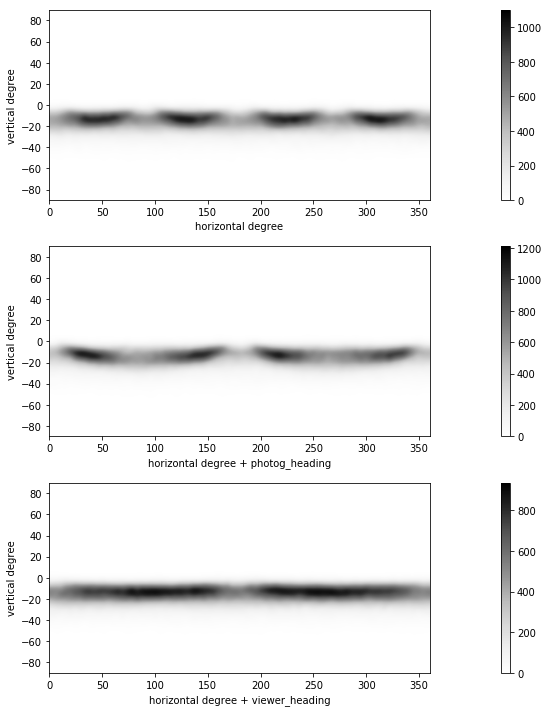

In [9]:
plt.figure(figsize=(20,10))

plt.subplot(3,1,1)
heatmap, xedges, yedges = np.histogram2d(hd, vd, bins=(80,40), range=((0, 360),(-90, 90)) )
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(np.flipud(heatmap.T), extent=extent, cmap='Greys', interpolation='bicubic')
plt.colorbar()
plt.xlabel('horizontal degree')
plt.ylabel('vertical degree')

plt.subplot(3,1,2)
heatmap, xedges, yedges = np.histogram2d(photog_heading_degree, vd, bins=(80,40), range=((0, 360),(-90, 90)) )
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(np.flipud(heatmap.T), extent=extent, cmap='Greys', interpolation='bicubic')
plt.colorbar()
plt.xlabel('horizontal degree + photog_heading')
plt.ylabel('vertical degree')

plt.subplot(3,1,3)
heatmap, xedges, yedges = np.histogram2d(viewer_heading_degree, vd, bins=(80,40), range=((0, 360),(-90, 90)) )
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(np.flipud(heatmap.T), extent=extent, cmap='Greys', interpolation='bicubic')
plt.colorbar()
plt.xlabel('horizontal degree + viewer_heading')
plt.ylabel('vertical degree')

plt.tight_layout()
plt.show()

In [10]:
min(photog_heading_degree), max(photog_heading_degree)

(0.0011596679689773737, 359.9940901536212)

In [11]:
len(hd), len(xs)

(247317, 247317)

# let's go with horiz and vert degree

plot heatmaps by feature type

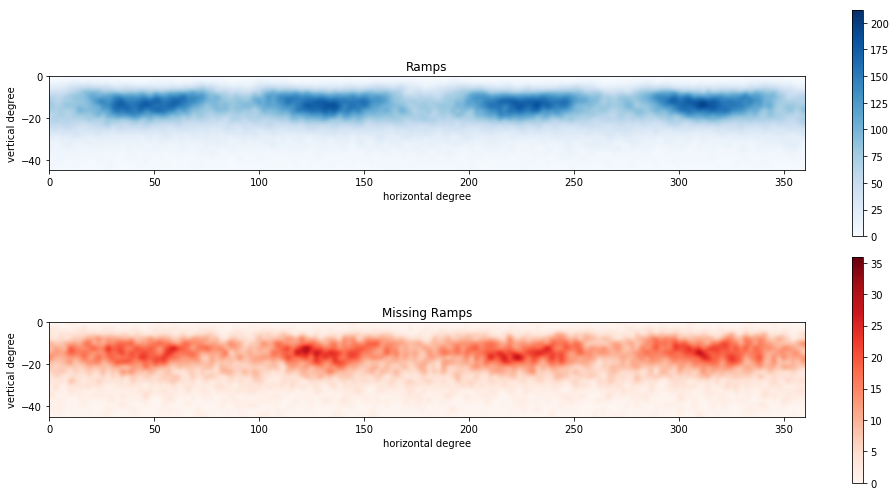

In [12]:
plt.figure(figsize=(14,7))

zipped_pts    = zip(hd, vd, lb)
ramps         = zip(*filter(lambda x: x[2]==0, zipped_pts))
missing_ramps = zip(*filter(lambda x: x[2]==1, zipped_pts))


plt.subplot(2,1,1)
x, y = ramps[:-1]
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(160,20), range=((0, 360),(-45,0)) )
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(np.flipud(heatmap.T), extent=extent, cmap='Blues', interpolation='bicubic')
plt.colorbar()
plt.title('Ramps')
plt.xlabel('horizontal degree')
plt.ylabel('vertical degree')

plt.subplot(2,1,2)
x, y = missing_ramps[:-1]
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(160,20), range=((0, 360),(-45, 0)) )
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(np.flipud(heatmap.T), extent=extent, cmap='Reds', interpolation='bicubic')
plt.colorbar()
plt.title('Missing Ramps')
plt.xlabel('horizontal degree')
plt.ylabel('vertical degree')

plt.tight_layout()

plt.show()

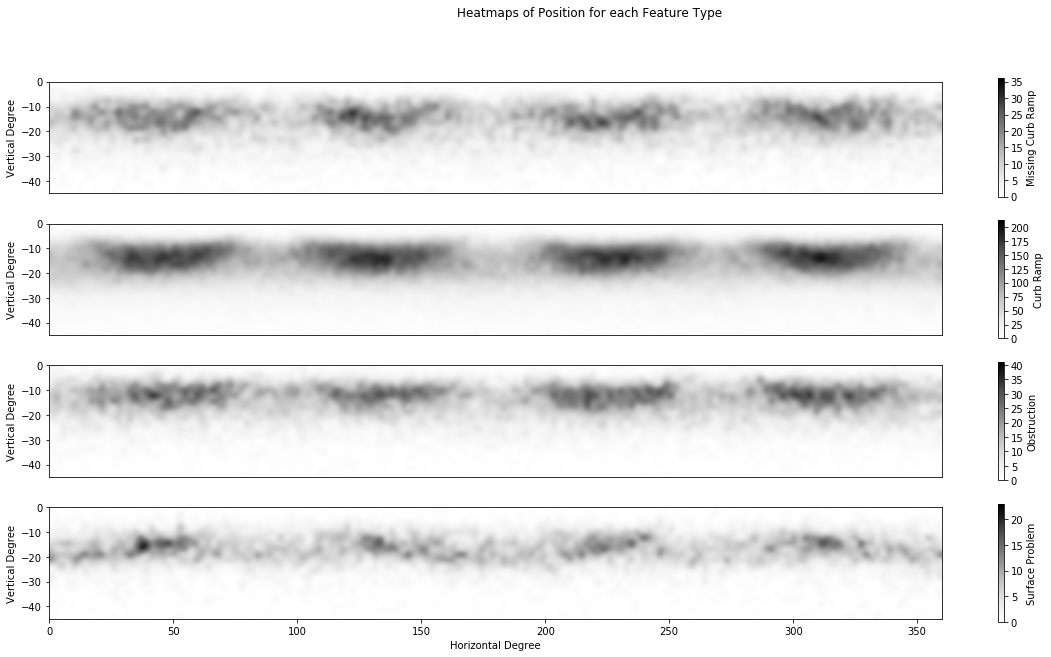

In [13]:
plt.figure(figsize=(20,10))
plt.suptitle("Heatmaps of Position for each Feature Type")

labels_to_points = defaultdict(list)

for x,y,label in zip(hd,vd,lb):
    if get_label_name[label] in ("Occlusion", "Other", "No Sidewalk"):
        continue
    labels_to_points[get_label_name[label]].append( (x,y) )

for index, data in enumerate(labels_to_points.iteritems()):
    label, points = data
    x,y = zip(*points)
    plt.subplot(len(labels_to_points),1,index+1)
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=(160,20), range=((0, 360),(-45,0)) )
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.imshow(np.flipud(heatmap.T), extent=extent, cmap='Greys', interpolation='bicubic')
    cbar = plt.colorbar()
    cbar.set_label(label)
    #plt.title(label, loc='center')
    if index+1 == len(labels_to_points):
        plt.xlabel('Horizontal Degree')
    else:
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False) # labels along the bottom edge are off
    plt.ylabel('Vertical Degree')

#plt.tight_layout()

plt.show()

# let's do the same but extend the view range to the full 180 to make Jon happy per here:

https://github.com/athersharif/temporal-tracking/issues/321

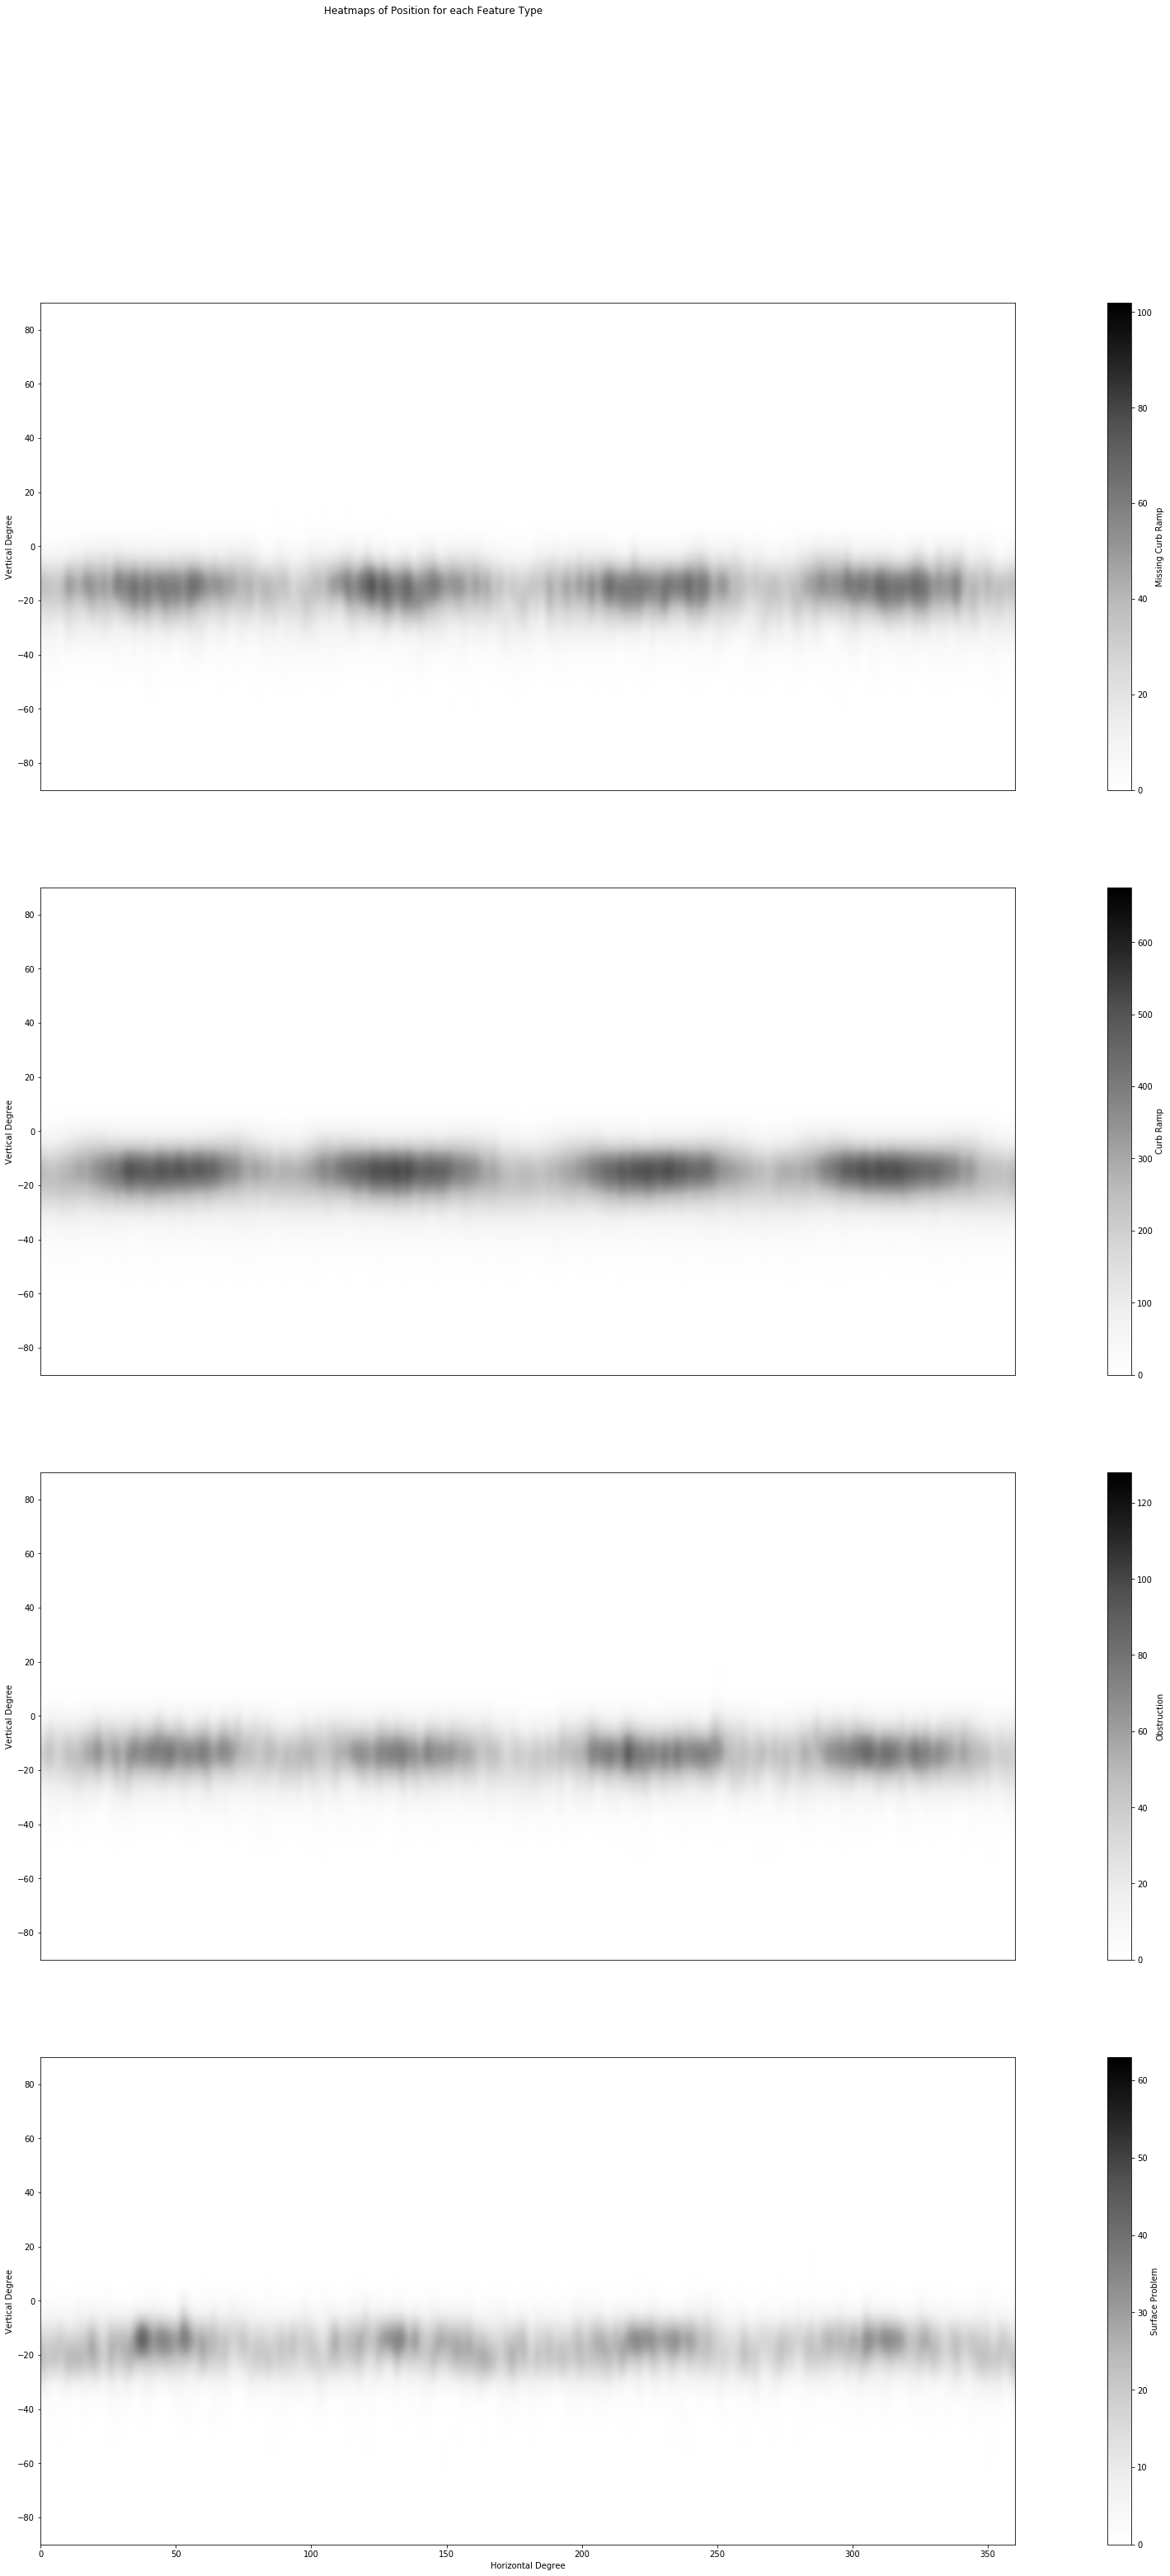

In [19]:
plt.figure(figsize=(40,50))
plt.suptitle("Heatmaps of Position for each Feature Type")

labels_to_points = defaultdict(list)

for x,y,label in zip(hd,vd,lb):
    if get_label_name[label] in ("Occlusion", "Other", "No Sidewalk"):
        continue
    labels_to_points[get_label_name[label]].append( (x,y) )

for index, data in enumerate(labels_to_points.iteritems()):
    label, points = data
    x,y = zip(*points)
    plt.subplot(len(labels_to_points),1,index+1)
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=(160,20), range=((0, 360),(-90,90)) )
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.imshow(np.flipud(heatmap.T), extent=extent, cmap='Greys', interpolation='bicubic')
    cbar = plt.colorbar()
    cbar.set_label(label)
    #plt.title(label, loc='center')
    if index+1 == len(labels_to_points):
        plt.xlabel('Horizontal Degree')
    else:
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False) # labels along the bottom edge are off
    plt.ylabel('Vertical Degree')

#plt.tight_layout()
plt.savefig('/mnt/c/Users/gweld/Desktop/heatmap.png')
plt.show()

# Let's see if we can export this to compute based on position



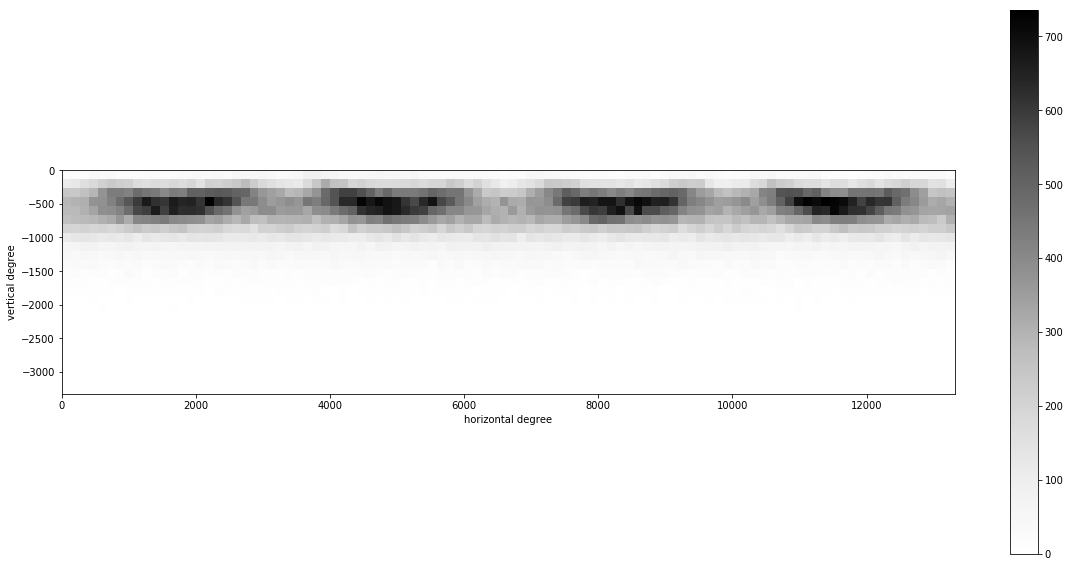

In [109]:
plt.figure(figsize=(20,10))

#heatmap, xedges, yedges = np.histogram2d(hd, vd, bins=(36,18), range=((0, 360),(-90, 90)) )
heatmap, xedges, yedges = np.histogram2d(xs, ys, bins=(100,25), range=((0, 13312),(-3328, 0)) )
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(np.flipud(heatmap.T), extent=extent, cmap='Greys', interpolation=None)
plt.colorbar()
plt.xlabel('horizontal degree')
plt.ylabel('vertical degree')

plt.show()

In [115]:
heatmap

array([[  0.,   0.,   0., ..., 243., 110.,  24.],
       [  0.,   0.,   0., ..., 239., 126.,  22.],
       [  0.,   0.,   0., ..., 263., 158.,  23.],
       ...,
       [  0.,   0.,   0., ..., 246., 146.,  35.],
       [  0.,   0.,   0., ..., 259., 150.,  31.],
       [  0.,   0.,   0., ..., 251., 107.,  20.]])

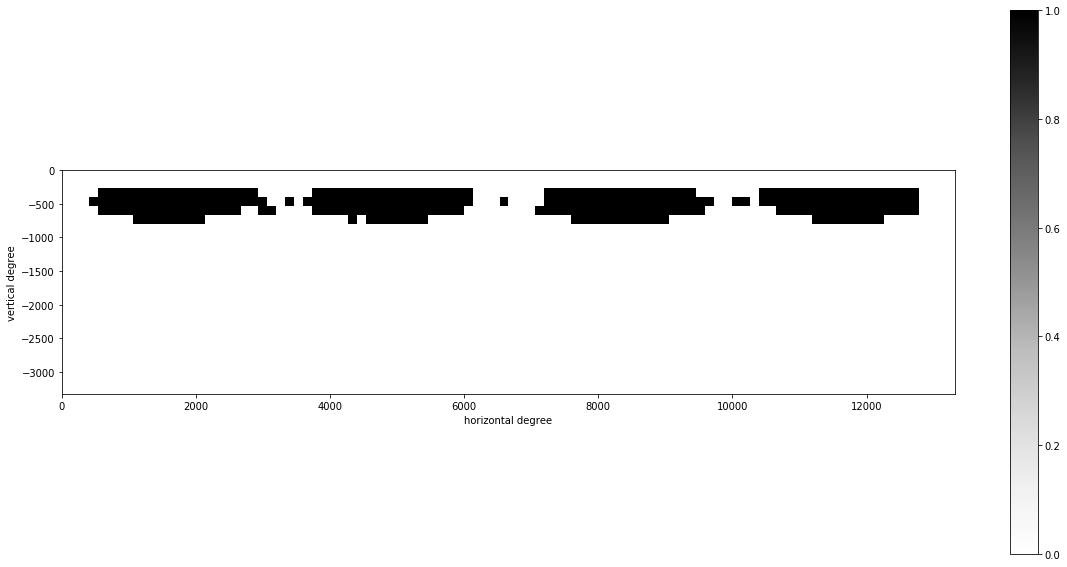

In [117]:
plt.figure(figsize=(20,10))

trymap = (heatmap/np.max(heatmap)) > .5


plt.imshow(np.flipud(trymap.T).astype(int), extent=extent, cmap='Greys', interpolation=None)
plt.colorbar()
plt.xlabel('horizontal degree')
plt.ylabel('vertical degree')

plt.show()

In [118]:
def include(sv_x, sv_y):
    if sv_x > 13312 or sv_x < 0:
        return False
    if sv_y > 0 or sv_y < -3328:
        return False
    
    boolmap = (heatmap/np.max(heatmap)) > .5
    
    bin_x = (float(sv_x) / 13312) * 100
    bin_y = (float(sv_y) / 3328) *  25
    
    bin_x = int(bin_x)
    bin_y = int(bin_y)
    
    print bin_x, bin_y
    return boolmap[bin_x, bin_y]

In [123]:
include(3800,-500)

28 -3


True

In [57]:
trymap.shape

(100, 25)

In [103]:
for i, row in enumerate(trymap): print i, row

0 [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]
1 [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]
2 [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]
3 [False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False]
4 [False False False False False False False False False False False False
 False False False False False False False False  True  True  True False
 False]
5 [False False False False False False False False False False False False
 False False False False False False False False  True  True  True False
 False]
6 [False False False False False False False False False False F

In [105]:
trymap[94, 22]

True